In [36]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import seaborn as sns

## 1. Format the Data

In [105]:
filepath = '/users/kristensu/dropbox/GA-DSI/DSI-copy/curriculum/week-07/4.2-lab-hierarchical-clustering'
df = pd.read_csv(filepath + '/assets/datasets/airport2.csv')

In [106]:
print df.shape
print df.columns

(33, 6)
Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')


Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [107]:
print df['Airport'].value_counts()
airport_dict = {'ANC': 0, 'ATL': 1, 'ABQ': 2}

def airport_code(x):
    if x in airport_dict:
        y = airport_dict[x]
    return y

df['Airport'] = df['Airport'].apply(airport_code)

ANC    11
ATL    11
ABQ    11
Name: Airport, dtype: int64


In [108]:
df['Airport'].value_counts()

2    11
1    11
0    11
Name: Airport, dtype: int64

## 2. Plot the data

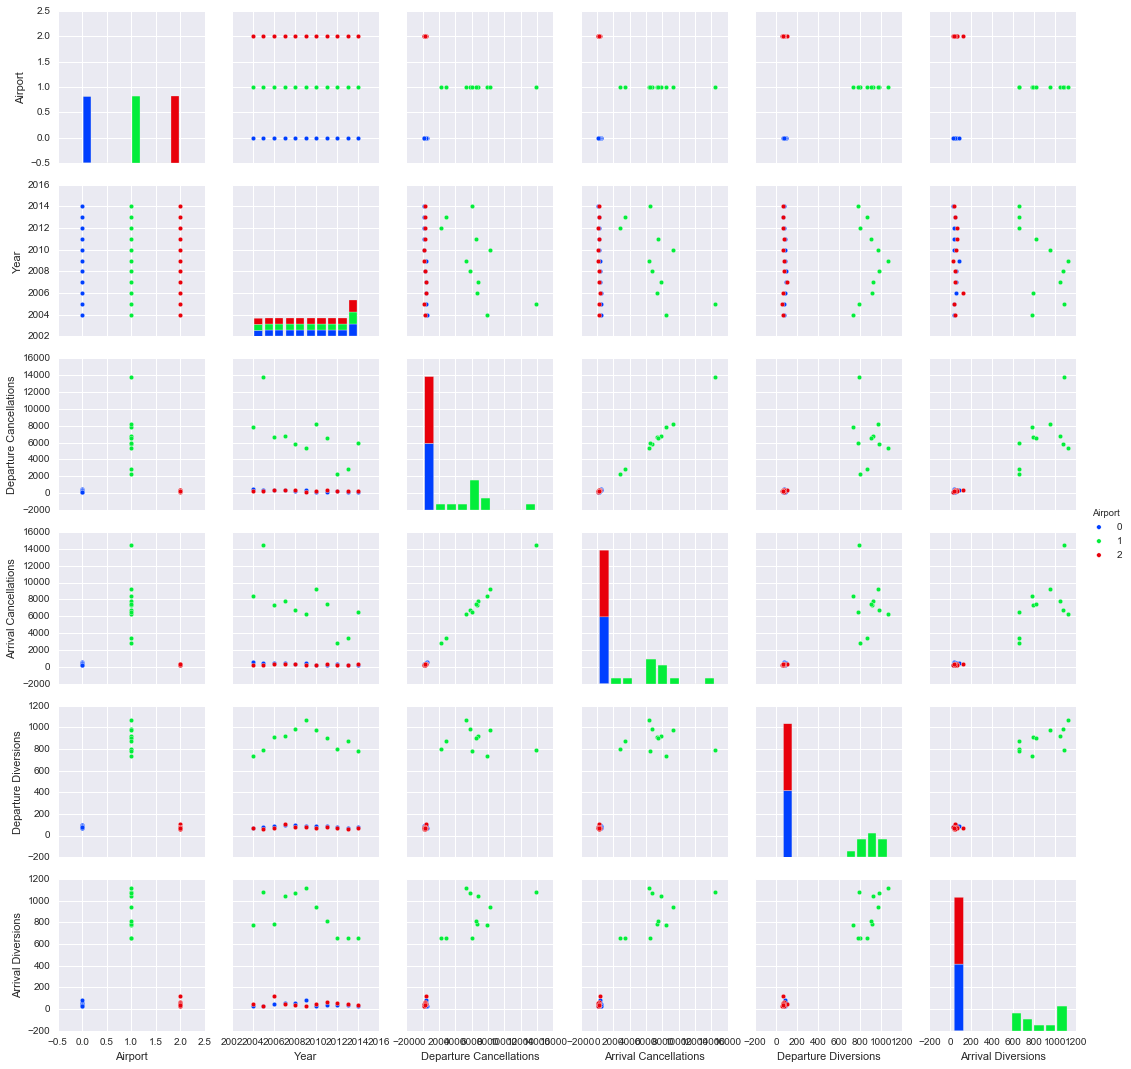

In [32]:
sns.set_palette('bright')
sns.pairplot(df, hue='Airport')

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [116]:
X = df.iloc[:, 2:].as_matrix(columns=None)
y = df.loc[:, 'Airport']

#### 3.2 Conduct the k-means clustering

In [117]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### 3.3 Compute the labels and centroids

In [118]:
from scipy import stats
labels = np.zeros_like(labels)
for i in range(k):
    mask = (labels == i)
    labels[mask] = stats.mode(y[mask])[0]

In [120]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns.values[2:])

print 'unique labels:', np.unique(labels)
print labels
print 'centroids: '
centroids_df

unique labels: [0 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 0 0 1]
centroids: 


,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,471.875,526.666667,140.375,98.083333
1,6646.750,7472.250000,908.875,900.500000
2,13837.000,14480.000000,790.000,1080.000000


In [121]:
df.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,2,2004,242,235,71,46


#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [122]:
inertia = kmeans.inertia_
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
accuracy = metrics.accuracy_score(y, labels)

print 'inertia: ', inertia
print 'silhouette: ', silhouette
print 'accuracy score: ', accuracy

inertia:  41358807.2917
silhouette:  0.847287601742
accuracy score:  0.575757575758


In [123]:
print metrics.classification_report(y, labels)

             precision    recall  f1-score   support

          0       0.46      1.00      0.63        11
          1       1.00      0.73      0.84        11
          2       0.00      0.00      0.00        11

avg / total       0.49      0.58      0.49        33



In [115]:
cm = metrics.confusion_matrix(y, labels)
np.array(cm)
pd.DataFrame(cm, columns = np.unique(labels))

,0,1,2
0,0,11,0
1,8,2,1
2,0,11,0


In [102]:
# df.drop('labels', axis=1, inplace=True)

In [95]:
df['labels'] = labels
print df['Airport'].value_counts()
print df['labels'].value_counts()

2    11
1    11
0    11
Name: Airport, dtype: int64
1    24
0     8
2     1
Name: labels, dtype: int64


**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

## 5. KNN Classifier

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier